## Apple Health Data

### Import Packages

In [47]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
sns.set()
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [48]:
temp = pd.read_csv(r'C:\Users\coleb\OneDrive\Cosmo\Datasets\Apple Health Project\HealthView_6-13-18_6-19-22.csv')

In [49]:
temp.head(1)

,Date,BLOOD OXYGEN (%),BODY FAT (%),BODY MASS INDEX,BODY TEMPERATURE (degF),BURNED CALORIES (kcal),DISTANCE (R+W) (mi),EXERCISE MINUTES,HEART RATE (bpm),HEART RATE VARIABILITY (ms),NET CALORIES (kcal),RESTING CALORIES (kcal),RESTING HEART RATE (bpm),SLEEP,STEPS,TOTAL CALORIES (kcal),WALKING HEART RATE (bpm),WEIGHT (lbs),WORKOUTS,DURATION
0,6/13/18,NaN,NaN,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3457.0,NaN,NaN,NaN,NaN,NaN


In [50]:
temp['Date'] = pd.to_datetime(temp['Date'])

In [51]:
temp.head(1)

,Date,BLOOD OXYGEN (%),BODY FAT (%),BODY MASS INDEX,BODY TEMPERATURE (degF),BURNED CALORIES (kcal),DISTANCE (R+W) (mi),EXERCISE MINUTES,HEART RATE (bpm),HEART RATE VARIABILITY (ms),NET CALORIES (kcal),RESTING CALORIES (kcal),RESTING HEART RATE (bpm),SLEEP,STEPS,TOTAL CALORIES (kcal),WALKING HEART RATE (bpm),WEIGHT (lbs),WORKOUTS,DURATION
0,2018-06-13,NaN,NaN,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3457.0,NaN,NaN,NaN,NaN,NaN


In [52]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1579 non-null   datetime64[ns]
 1   BLOOD OXYGEN (%)             93 non-null     object        
 2   BODY FAT (%)                 50 non-null     float64       
 3   BODY MASS INDEX              53 non-null     float64       
 4   BODY TEMPERATURE (degF)      0 non-null      float64       
 5   BURNED CALORIES (kcal)       1235 non-null   float64       
 6   DISTANCE (R+W) (mi)          1468 non-null   float64       
 7   EXERCISE MINUTES             1197 non-null   object        
 8   HEART RATE (bpm)             1224 non-null   float64       
 9   HEART RATE VARIABILITY (ms)  1202 non-null   float64       
 10  NET CALORIES (kcal)          1254 non-null   float64       
 11  RESTING CALORIES (kcal)      1254 non-null 

In [53]:
df = temp.sort_values(by='Date', ascending=False)

In [54]:
df.head()

,Date,BLOOD OXYGEN (%),BODY FAT (%),BODY MASS INDEX,BODY TEMPERATURE (degF),BURNED CALORIES (kcal),DISTANCE (R+W) (mi),EXERCISE MINUTES,HEART RATE (bpm),HEART RATE VARIABILITY (ms),NET CALORIES (kcal),RESTING CALORIES (kcal),RESTING HEART RATE (bpm),SLEEP,STEPS,TOTAL CALORIES (kcal),WALKING HEART RATE (bpm),WEIGHT (lbs),WORKOUTS,DURATION
1578,2022-06-19,93 - 100,NaN,NaN,NaN,107.54,1.55,NaN,57.5,51.75,1447.22,1339.68,38.0,5h 25m,3484.0,1447.22,NaN,NaN,NaN,NaN
1577,2022-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,31m
1576,2022-06-18,95 - 100,NaN,NaN,NaN,830.47,7.18,1h 29m,106.5,83.32,2621.52,1791.05,43.0,3h 15m,14140.0,2621.52,78.0,NaN,Running,28m
1575,2022-06-17,92 - 98,NaN,NaN,NaN,663.87,4.59,19m,68.5,66.31,2734.58,2070.71,NaN,4h 9m,9569.0,2734.58,NaN,NaN,NaN,NaN
1574,2022-06-16,92 - 97,NaN,NaN,NaN,674.43,8.16,1h 10m,84.5,106.87,2504.55,1830.12,48.0,4h 54m,17008.0,2504.55,76.0,NaN,Running,23m


<AxesSubplot:xlabel='Date'>

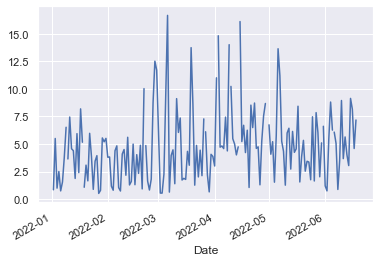

In [55]:
# check data for 2022
(
    df
    .set_index('Date')
    .query('Date > 20220101')
    ['DISTANCE (R+W) (mi)']
    .plot()
)


In [56]:
mmr_df = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv', header=0)
mmr_df.info()
mmr_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          690 non-null    object 
 1   Workout Date            690 non-null    object 
 2   Activity Type           690 non-null    object 
 3   Calories Burned (kCal)  690 non-null    int64  
 4   Distance (mi)           690 non-null    float64
 5   Workout Time (seconds)  690 non-null    int64  
 6   Avg Pace (min/mi)       690 non-null    float64
 7   Max Pace                690 non-null    float64
 8   Avg Speed (mi/h)        690 non-null    float64
 9   Max Speed               690 non-null    float64
 10  Avg Heart Rate          455 non-null    float64
 11  Steps                   666 non-null    float64
 12  Notes                   690 non-null    object 
 13  Source                  690 non-null    object 
 14  Link                    690 non-null    ob

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"June 19, 2022","June 19, 2022",Run,378,2.66,1800,11.2782,0.0,5.32,0.0,NaN,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994


In [57]:
mmr_df['Workout_Date'] = pd.to_datetime(mmr_df['Workout Date']).dt.date
mmr_df.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link,Workout_Date
0,"June 19, 2022","June 19, 2022",Run,378,2.66,1800,11.2782,0.0,5.32,0.0,NaN,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994,2022-06-19


In [58]:
df.rename(columns = {'Date':'Workout_Date'}, inplace = True)
df['Workout_Date'] = pd.to_datetime(df['Workout_Date']).dt.date
df.head(1)

,Workout_Date,BLOOD OXYGEN (%),BODY FAT (%),BODY MASS INDEX,BODY TEMPERATURE (degF),BURNED CALORIES (kcal),DISTANCE (R+W) (mi),EXERCISE MINUTES,HEART RATE (bpm),HEART RATE VARIABILITY (ms),NET CALORIES (kcal),RESTING CALORIES (kcal),RESTING HEART RATE (bpm),SLEEP,STEPS,TOTAL CALORIES (kcal),WALKING HEART RATE (bpm),WEIGHT (lbs),WORKOUTS,DURATION
1578,2022-06-19,93 - 100,NaN,NaN,NaN,107.54,1.55,NaN,57.5,51.75,1447.22,1339.68,38.0,5h 25m,3484.0,1447.22,NaN,NaN,NaN,NaN


In [59]:
mdf = df.merge(mmr_df, on='Workout_Date', how='left')

In [60]:
mdf.info()
mdf.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 1874
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Workout_Date                 1875 non-null   object 
 1   BLOOD OXYGEN (%)             101 non-null    object 
 2   BODY FAT (%)                 53 non-null     float64
 3   BODY MASS INDEX              56 non-null     float64
 4   BODY TEMPERATURE (degF)      0 non-null      float64
 5   BURNED CALORIES (kcal)       1398 non-null   float64
 6   DISTANCE (R+W) (mi)          1631 non-null   float64
 7   EXERCISE MINUTES             1360 non-null   object 
 8   HEART RATE (bpm)             1387 non-null   float64
 9   HEART RATE VARIABILITY (ms)  1364 non-null   float64
 10  NET CALORIES (kcal)          1417 non-null   float64
 11  RESTING CALORIES (kcal)      1417 non-null   float64
 12  RESTING HEART RATE (bpm)     1096 non-null   float64
 13  SLEEP             

,Workout_Date,BLOOD OXYGEN (%),BODY FAT (%),BODY MASS INDEX,BODY TEMPERATURE (degF),BURNED CALORIES (kcal),DISTANCE (R+W) (mi),EXERCISE MINUTES,HEART RATE (bpm),HEART RATE VARIABILITY (ms),...,Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,2022-06-19,93 - 100,NaN,NaN,NaN,107.54,1.55,NaN,57.5,51.75,...,1800.0,11.27820,0.00000,5.32000,0.0000,NaN,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994
1,2022-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1698.0,10.96610,1.11240,5.47140,53.9375,159.0,4431.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6655598125
2,2022-06-18,95 - 100,NaN,NaN,NaN,830.47,7.18,1h 29m,106.5,83.32,...,1698.0,10.96610,1.11240,5.47140,53.9375,159.0,4431.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6655598125
3,2022-06-17,92 - 98,NaN,NaN,NaN,663.87,4.59,19m,68.5,66.31,...,1391.0,9.94993,0.00000,6.03019,0.0000,NaN,3684.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6652076194
4,2022-06-16,92 - 97,NaN,NaN,NaN,674.43,8.16,1h 10m,84.5,106.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-06-15,95 - 99,NaN,NaN,NaN,1012.97,9.14,1h 34m,90.0,63.49,...,1691.0,9.09140,0.00000,6.59965,0.0000,NaN,4520.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6649778854
6,2022-06-14,90 - 99,NaN,NaN,NaN,423.42,3.04,21m,67.0,70.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-06-13,95 - 100,NaN,NaN,NaN,399.93,4.03,17m,73.0,83.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-06-12,95 - 98,NaN,NaN,NaN,646.05,5.64,46m,71.0,84.63,...,1955.0,10.51630,3.00814,5.70545,19.9459,0.0,5052.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6641879077
9,2022-06-11,94 - 98,NaN,NaN,NaN,538.98,3.67,29m,73.0,96.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
for col in mdf.columns:
    pct_missing = np.mean(mdf[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Workout_Date - 0%
BLOOD OXYGEN (%) - 95%
BODY FAT (%) - 97%
BODY MASS INDEX - 97%
BODY TEMPERATURE (degF) - 100%
BURNED CALORIES (kcal) - 25%
DISTANCE (R+W) (mi) - 13%
EXERCISE MINUTES - 27%
HEART RATE (bpm) - 26%
HEART RATE VARIABILITY (ms) - 27%
NET CALORIES (kcal) - 24%
RESTING CALORIES (kcal) - 24%
RESTING HEART RATE (bpm) - 42%
SLEEP - 43%
STEPS - 13%
TOTAL CALORIES (kcal) - 24%
WALKING HEART RATE (bpm) - 45%
WEIGHT (lbs) - 97%
WORKOUTS - 50%
 DURATION - 50%
Date Submitted - 51%
Workout Date - 51%
Activity Type - 51%
Calories Burned (kCal) - 51%
Distance (mi) - 51%
Workout Time (seconds) - 51%
Avg Pace (min/mi) - 51%
Max Pace - 51%
Avg Speed (mi/h) - 51%
Max Speed - 51%
Avg Heart Rate - 64%
Steps - 53%
Notes - 51%
Source - 51%
Link - 51%


In [62]:
mdft = mdf

created missing indicator for: BLOOD OXYGEN (%)
created missing indicator for: BODY FAT (%)
created missing indicator for: BODY MASS INDEX
created missing indicator for: BODY TEMPERATURE (degF)
created missing indicator for: BURNED CALORIES (kcal)
created missing indicator for: DISTANCE (R+W) (mi)
created missing indicator for: EXERCISE MINUTES
created missing indicator for: HEART RATE (bpm)
created missing indicator for: HEART RATE VARIABILITY (ms)
created missing indicator for: NET CALORIES (kcal)
created missing indicator for: RESTING CALORIES (kcal)
created missing indicator for: RESTING HEART RATE (bpm)
created missing indicator for: SLEEP
created missing indicator for: STEPS
created missing indicator for: TOTAL CALORIES (kcal)
created missing indicator for: WALKING HEART RATE (bpm)
created missing indicator for: WEIGHT (lbs)
created missing indicator for: WORKOUTS
created missing indicator for:  DURATION
created missing indicator for: Date Submitted
created missing indicator for:

,Workout_Date,BLOOD OXYGEN (%),BODY FAT (%),BODY MASS INDEX,BODY TEMPERATURE (degF),BURNED CALORIES (kcal),DISTANCE (R+W) (mi),EXERCISE MINUTES,HEART RATE (bpm),HEART RATE VARIABILITY (ms),...,Avg Pace (min/mi)_ismissing,Max Pace_ismissing,Avg Speed (mi/h)_ismissing,Max Speed_ismissing,Avg Heart Rate_ismissing,Steps_ismissing,Notes_ismissing,Source_ismissing,Link_ismissing,num_missing
0,2022-06-19,93 - 100,NaN,NaN,NaN,107.54,1.55,NaN,57.5,51.75,...,False,False,False,False,True,False,False,False,False,9
1,2022-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,17
2,2022-06-18,95 - 100,NaN,NaN,NaN,830.47,7.18,1h 29m,106.5,83.32,...,False,False,False,False,False,False,False,False,False,4
3,2022-06-17,92 - 98,NaN,NaN,NaN,663.87,4.59,19m,68.5,66.31,...,False,False,False,False,True,False,False,False,False,9
4,2022-06-16,92 - 97,NaN,NaN,NaN,674.43,8.16,1h 10m,84.5,106.87,...,True,True,True,True,True,True,True,True,True,19
5,2022-06-15,95 - 99,NaN,NaN,NaN,1012.97,9.14,1h 34m,90.0,63.49,...,False,False,False,False,True,False,False,False,False,5
6,2022-06-14,90 - 99,NaN,NaN,NaN,423.42,3.04,21m,67.0,70.91,...,True,True,True,True,True,True,True,True,True,21
7,2022-06-13,95 - 100,NaN,NaN,NaN,399.93,4.03,17m,73.0,83.38,...,True,True,True,True,True,True,True,True,True,21
8,2022-06-12,95 - 98,NaN,NaN,NaN,646.05,5.64,46m,71.0,84.63,...,False,False,False,False,False,False,False,False,False,4
9,2022-06-11,94 - 98,NaN,NaN,NaN,538.98,3.67,29m,73.0,96.08,...,True,True,True,True,True,True,True,True,True,21


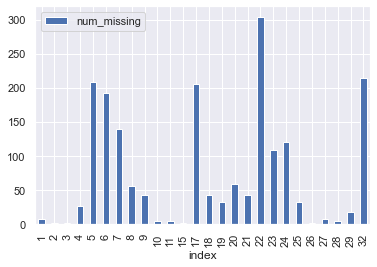

In [63]:
for col in mdft.columns:
    missing = mdft[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        mdft['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in mdft.columns if 'ismissing' in col]
mdft['num_missing'] = mdft[ismissing_cols].sum(axis=1)

mdft['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
mdft.head(10)

In [64]:
# drop rows with missing values.
ind_missing = mdft[mdft[' DURATION_ismissing'] == 1].index
mdft_lmr = mdft.drop(ind_missing, axis=0)

In [65]:
mdft_lmr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 1653
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Workout_Date                           943 non-null    object 
 1   BLOOD OXYGEN (%)                       60 non-null     object 
 2   BODY FAT (%)                           24 non-null     float64
 3   BODY MASS INDEX                        25 non-null     float64
 4   BODY TEMPERATURE (degF)                0 non-null      float64
 5   BURNED CALORIES (kcal)                 698 non-null    float64
 6   DISTANCE (R+W) (mi)                    699 non-null    float64
 7   EXERCISE MINUTES                       698 non-null    object 
 8   HEART RATE (bpm)                       698 non-null    float64
 9   HEART RATE VARIABILITY (ms)            686 non-null    float64
 10  NET CALORIES (kcal)                    698 non-null    float64
 11  RESTI

### Work with the sleep data

In [127]:
sleep_df = mdft_lmr[['Workout_Date', 'SLEEP']]

In [128]:
sleep_df.dropna(inplace=True)

In [129]:
sleep_df.head(10)

,Workout_Date,SLEEP
2,2022-06-18,3h 15m
4,2022-06-16,4h 54m
5,2022-06-15,6h 3m
8,2022-06-12,3h 55m
10,2022-06-10,4h 37m
13,2022-06-07,6h 59m
14,2022-06-06,6h 20m
17,2022-06-05,6h 40m
18,2022-06-05,6h 40m
19,2022-06-04,7h


In [130]:
# for item in sleep_df['SLEEP']:
#     if "m" not in df['SLEEP']:
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].str.replace('h', '')
#         sleep_df['SLEEP'].str.strip()
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].str.replace('m', '')
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].str.strip()
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].astype(int)
#     else:
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].str.replace('m', '')
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].str.strip()
#         sleep_df['SLEEP'] = sleep_df['SLEEP'].astype(int)



In [131]:
sleep_df['SLEEP'] = sleep_df['SLEEP'].str.strip()

In [132]:
sleep_df[['SLEEP HOUR', 'SLEEP MIN']] = sleep_df['SLEEP'].str.split(' ', 1, expand=True)

In [133]:
sleep_df.head(10)

,Workout_Date,SLEEP,SLEEP HOUR,SLEEP MIN
2,2022-06-18,3h 15m,3h,15m
4,2022-06-16,4h 54m,4h,54m
5,2022-06-15,6h 3m,6h,3m
8,2022-06-12,3h 55m,3h,55m
10,2022-06-10,4h 37m,4h,37m
13,2022-06-07,6h 59m,6h,59m
14,2022-06-06,6h 20m,6h,20m
17,2022-06-05,6h 40m,6h,40m
18,2022-06-05,6h 40m,6h,40m
19,2022-06-04,7h,7h,None


In [134]:
sleep_df = sleep_df.drop(columns=['SLEEP'])
sleep_df = sleep_df.replace(r'\D', '', regex=True)
sleep_df[['SLEEP HOUR', 'SLEEP MIN']] = sleep_df[['SLEEP HOUR', 'SLEEP MIN']].fillna(0).astype(int)

In [136]:
sleep_df['SLEEP'] = sleep_df['SLEEP HOUR'] * 60 + sleep_df['SLEEP MIN']
sleep_df.head()

,Workout_Date,SLEEP HOUR,SLEEP MIN,SLEEP
2,2022-06-18,3,15,195
4,2022-06-16,4,54,294
5,2022-06-15,6,3,363
8,2022-06-12,3,55,235
10,2022-06-10,4,37,277


<AxesSubplot:xlabel='Workout_Date'>

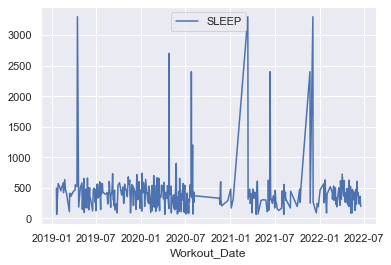

In [138]:
sleep_df.plot(x='Workout_Date', y='SLEEP')

In [139]:
#Expand my date column
sleep_df['Date'] = pd.to_datetime(sleep_df['Workout_Date'])
sleep_df['Day'] = sleep_df['Date'].dt.dayofweek
sleep_df['Month'] = sleep_df['Date'].dt.month
sleep_df['Year'] = sleep_df['Date'].dt.year
sleep_df['Hour'] = sleep_df['Date'].dt.hour
sleep_df['Minute'] = sleep_df['Date'].dt.minute
sleep_df['Second'] = sleep_df['Date'].dt.second
sleep_df['Day_of_Year'] = sleep_df['Date'].dt.dayofyear
sleep_df['Week_of_Year'] = sleep_df['Date'].dt.weekofyear
sleep_df['Quarter'] = sleep_df['Date'].dt.quarter
sleep_df['Month_of_Year'] = sleep_df['Date'].dt.month_name()
sleep_df['Week_of_Month'] = sleep_df['Date'].dt.week
sleep_df['Day_of_Month'] = sleep_df['Date'].dt.day
sleep_df['Day_of_Week'] = sleep_df['Date'].dt.day_name()
sleep_df['Day_of_Year'] = sleep_df['Date'].dt.dayofyear

In [141]:
sleep_df.head()

,Workout_Date,SLEEP HOUR,SLEEP MIN,SLEEP,Date,Day,Month,Year,Hour,Minute,Second,Day_of_Year,Week_of_Year,Quarter,Month_of_Year,Week_of_Month,Day_of_Month,Day_of_Week
2,2022-06-18,3,15,195,2022-06-18,5,6,2022,0,0,0,169,24,2,June,24,18,Saturday
4,2022-06-16,4,54,294,2022-06-16,3,6,2022,0,0,0,167,24,2,June,24,16,Thursday
5,2022-06-15,6,3,363,2022-06-15,2,6,2022,0,0,0,166,24,2,June,24,15,Wednesday
8,2022-06-12,3,55,235,2022-06-12,6,6,2022,0,0,0,163,23,2,June,23,12,Sunday
10,2022-06-10,4,37,277,2022-06-10,4,6,2022,0,0,0,161,23,2,June,23,10,Friday
